In [65]:
using DataFrames, CSV, Dates, Measures, Statistics, StatsPlots, IterativeSolvers, Polynomials, DelimitedFiles
trial = joinpath("function_trials","trial_150_80%_1.0","defluence_poly.csv")
coefs = readdlm(trial, '\t', Float64)
gr()

Plots.GRBackend()

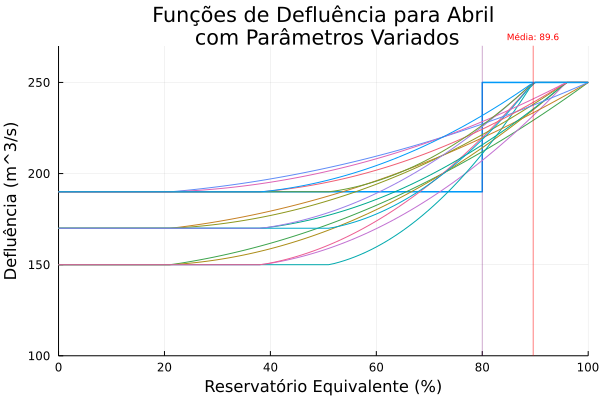

In [117]:
myplot = plot([0,80,100], [190,250,250], 
    linetype=:steppost,
    ylim=(100,270),
    xlim=(0,100),
    legend = true,
    title = "Funções de Defluência para Abril\n com Parâmetros Variados",
    width = 1.5,
    ylabel = "Defluência (m^3/s)",
    xlabel = "Reservatório Equivalente (%)",
    label = "ANA"
)
minimum = 150
myplot = plot!([80], seriestype="vline",color=:purple, alpha = 0.3)
annotate!(80, -15, text("80%", :purple, 6))
x = 0.0:0.01:1.0

for min_flow in [150,170,190]
    for reservoir_confidence in [0,0.4,1]
        for tail_height in 1.5:0.5:2

            trial_name = "trial_$(min_flow)_$(Int64(round(100*reservoir_confidence)))%_$(tail_height)"
            trial = joinpath("function_trials",trial_name)

            if isdir(trial)
                trial = joinpath("function_trials",trial_name,"defluence_poly.csv")
                coefs = readdlm(trial, '\t', Float64)
                p = Polynomial(coefs[4,:])
                d = derivative(p)
                m = vec(readdlm(joinpath("function_trials",trial_name,"defluence_poly_meta.csv"), '\t', Float64))
                minimum = m[1]
                y = [p(j) > 250 && (d(j) > 0) ? 250.0 : (p(j) > minimum) && (d(j) > 0) ? p(j) : minimum for j in x]
                myplot = plot!(x*100,y,
                legend = false,
                ylim=(100,270)
                )
                mean = 0.896*100
                
            end
            
        end
    end
end
myplot = plot!([mean], seriestype="vline",color=:red,width=0.5)
annotate!(mean, 275, text("Média: "*string(round(mean,digits=1)), :red, 6))

savefig(joinpath("figures","variety.png"))
display(myplot)

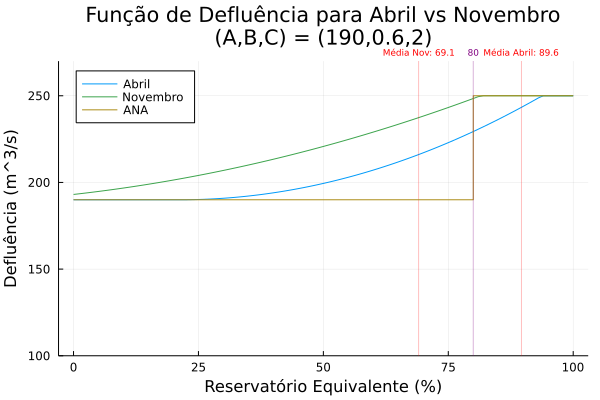

In [152]:
trial_name = "trial_190_60%_2.0"
trial = joinpath("function_trials",trial_name,"defluence_poly.csv")
coefs = readdlm(trial, '\t', Float64)
p = Polynomial(coefs[4,:])
d = derivative(p)
m = vec(readdlm(joinpath("function_trials",trial_name,"defluence_poly_meta.csv"), '\t', Float64))
minimum = m[1]
y = [p(j) > 250 && (d(j) > 0) ? 250.0 : (p(j) > minimum) && (d(j) > 0) ? p(j) : minimum for j in x]
myplot = plot(x*100,y,
    ylim=(100,270),
    title = "Função de Defluência para Abril vs Novembro\n(A,B,C) = (190,0.6,2)\n",
    label = "Abril",
    legend = :topleft,
    ylabel = "Defluência (m^3/s)",
    xlabel = "Reservatório Equivalente (%)",
)
mean = 0.896*100
myplot = plot!([mean], seriestype="vline",color=:red,width=0.5,label="", alpha = 0.5)
annotate!(mean, 275, text("Média Abril: "*string(round(mean,digits=1)), :red, 6))

p = Polynomial(coefs[11,:])
d = derivative(p)
y = [p(j) > 250 && (d(j) > 0) ? 250.0 : (p(j) > minimum) && (d(j) > 0) ? p(j) : minimum for j in x]
myplot = plot!(x*100,y,
    ylim=(100,270),
    label = "Novembro"
)
mean = 0.691*100
myplot = plot!([mean], seriestype="vline",color=:red,width=0.5,label="", alpha = 0.5)
annotate!(mean, 275, text("Média Nov: "*string(round(mean,digits=1)), :red, 6))

myplot = plot!([0,80,100], [190,250,250], 
    linetype=:steppost,
    label = "ANA"
)
minimum = 150
myplot = plot!([80], seriestype="vline",color=:purple, alpha = 0.3,label="")
annotate!(80, 275, text("80", :purple, 6))
savefig(joinpath("figures","abril_vs_nov.png"))
myplot

In [143]:
d = 190:1:250
a = 120/190
b = d*a
v = d*(1-a)
plot(d,b,
    ylim = (50,160),
    label = "Bombeamento",
    title = "Vazão de Santa Cecília",
    ylabel = "Vazão (m^3/s)",
    xlabel = "Defluência (m^3/s)",
    legend = :topleft
)

plot!(d,v,
    label = "Vertimento"
)
savefig(joinpath("figures","sta_cecilia.png"))


In [150]:
c = 0
for i in readdir("function_trials")
    c+=1
end
c

64

In [180]:
x = Dates.Date(1931) : Month(1) : Dates.Date(2020) - Month(1)
@show x
plot(x,curve*100,
    size = (1000,300),
    label = "(190,0.6,2.0)",
    legend = :bottomleft,
    ylabel = "Reservatório Equivalente\nParaíba do Sul (%)",
    left_margin = 10mm,
    title = "Série Temporal de Reservatório Equivalente"
)
plot!(x,base*100,
    label = "ANA"
)
savefig(joinpath("figures","reservoir.png"))

x = Date("1931-01-01"):Month(1):Date("2019-12-01")


In [153]:
curve = [0.946673161
0.998262149
1
1
1
1
0.968483024
0.913217169
0.874887177
0.856265754
0.892652822
1
1
1
1
1
1
1
0.973442966
0.931900395
0.882151552
0.847789237
0.865958882
0.990069205
1
1
1
0.932468635
0.883986941
0.816973582
0.74675714
0.671512641
0.613698403
0.567248487
0.560669128
0.66337843
0.771941508
0.804777848
0.840695731
0.818422175
0.777417298
0.718360162
0.652364263
0.575313904
0.518425799
0.464784012
0.424321871
0.557455645
0.647789582
0.753960411
0.807819604
0.833321626
0.836425725
0.801305847
0.741049464
0.674094659
0.625797994
0.636481041
0.629360383
0.615388525
0.596127176
0.637352985
0.818867904
0.875025859
0.872372515
0.841659293
0.798139811
0.74448529
0.717012382
0.660905663
0.64462687
0.733964196
0.841071196
0.891232933
0.919713918
0.936121186
0.964766229
0.937660908
0.877465208
0.798918959
0.716567578
0.685697952
0.728652065
0.894440718
0.957551904
1
1
1
1
0.976374351
0.925568861
0.88826266
0.853377685
0.869387115
0.959863231
1
1
1
1
1
0.991498165
0.947591622
0.888023541
0.813243934
0.741722176
0.66296094
0.649340192
0.698162937
0.836958327
0.94072573
0.985749568
0.962298203
0.937820981
0.882075828
0.808099486
0.720838355
0.642986387
0.580967622
0.611433539
0.633478505
0.694209486
0.700869976
0.719181646
0.696023845
0.640700259
0.576820717
0.518336113
0.438106843
0.433303204
0.459441889
0.50383522
0.624438931
0.691041026
0.729482177
0.777707636
0.802936637
0.79685069
0.747697884
0.698809273
0.628287873
0.558423266
0.503688007
0.518861246
0.64967835
0.712265645
0.755322269
0.803496235
0.800604539
0.760716784
0.706440388
0.638776919
0.571062314
0.508363728
0.485505043
0.480650592
0.558656106
0.631901647
0.749760534
0.869445314
0.892881326
0.883353089
0.846252161
0.79263879
0.714674738
0.63601628
0.55062193
0.526621315
0.543192427
0.602720454
0.759927352
0.812340013
0.848415393
0.833995272
0.811872637
0.808953472
0.735219923
0.667632584
0.59199619
0.587764601
0.662914716
0.782757295
0.81966603
0.872407977
0.89245212
0.86947489
0.825237315
0.763287132
0.683571121
0.600719891
0.554221847
0.555008306
0.569784651
0.74580019
0.826178802
0.917016266
0.954272027
0.981900287
0.991767366
1
0.971617399
0.969736113
0.970610765
1
1
1
1
1
1
1
1
0.972822974
0.936887107
0.885962296
0.82704561
0.845539557
0.890856799
1
1
1
0.996940307
0.968087329
0.923626518
0.867094883
0.783528063
0.705485936
0.637636077
0.629337461
0.685390556
0.844870954
0.963037385
1
1
1
0.992492269
0.957233675
0.892589541
0.820575328
0.783074905
0.817386055
0.958868204
1
1
1
1
1
0.98711963
0.95308538
0.900270072
0.836851997
0.771017427
0.748104192
0.766534729
0.904916525
1
1
1
0.982862144
0.984340326
0.939758078
0.875690971
0.831554644
0.759425028
0.778007788
0.810823275
0.751399282
0.755572079
0.739623183
0.744906568
0.719718575
0.664322211
0.59383967
0.512446406
0.443151635
0.379735965
0.410853915
0.484498845
0.482430972
0.566861007
0.608968851
0.60089983
0.625129637
0.603909003
0.545218995
0.465720808
0.387834194
0.334420239
0.302077023
0.281164312
0.400936803
0.400054122
0.426035519
0.411268237
0.37181087
0.319632398
0.247877557
0.165715698
0.09660789
0.022638233
-0.00986184
0.024394974
0.057265683
0.079823253
0.220251121
0.242343394
0.247640495
0.257576008
0.213222903
0.197926667
0.148566887
0.116196689
0.105978896
0.16465575
0.307602456
0.378110843
0.474320315
0.548810262
0.567268348
0.542883102
0.502993682
0.444221814
0.439932649
0.384007255
0.439663513
0.484851494
0.508627175
0.635296325
0.707112875
0.739605439
0.78247154
0.809702237
0.782409038
0.716686605
0.676483064
0.64849678
0.7221113
0.851566605
0.942341562
1
1
1
0.979160993
0.922740792
0.848227155
0.77394362
0.691908372
0.608695047
0.612447803
0.633234664
0.714991183
0.836818753
0.8967479
0.90521108
0.890110525
0.840460667
0.775474402
0.705492579
0.628554428
0.56535212
0.587546671
0.753946725
0.826502365
0.926537993
1
1
1
0.973389552
0.915135418
0.842285288
0.763720418
0.677109294
0.653368973
0.686884223
0.831227568
0.921729477
0.986399427
1
0.978544134
0.919737215
0.847696139
0.76780237
0.717641926
0.719829047
0.789434286
0.946532413
0.996584572
1
1
0.950377433
0.882123718
0.798953976
0.709800873
0.615639626
0.520910778
0.444769769
0.440468314
0.400731521
0.408527566
0.544631116
0.573254545
0.547935568
0.514686484
0.455276621
0.400506315
0.326084989
0.249693725
0.212602053
0.187978946
0.240708616
0.422505112
0.499778889
0.587639379
0.593786114
0.632398054
0.611120543
0.574058874
0.509471921
0.435241924
0.429801095
0.478979129
0.617827483
0.738215902
0.793576014
0.87253719
0.919065189
0.919362889
0.872642365
0.809791462
0.745971527
0.682090824
0.650239484
0.812810752
0.912492939
1
1
1
1
1
1
0.976542931
0.920053182
0.868376233
0.822683494
0.889372322
1
1
1
1
0.97544975
0.929977375
0.862906183
0.785769423
0.707778349
0.635209234
0.558947944
0.508777189
0.540463594
0.587615518
0.658870226
0.70907023
0.70012125
0.646988793
0.591694123
0.515576779
0.441504006
0.363732196
0.314095945
0.395810183
0.514641654
0.623960789
0.722464961
0.790554547
0.779427647
0.74139986
0.68701522
0.634553113
0.57002514
0.566626919
0.543527735
0.563815393
0.587449164
0.584864165
0.530221574
0.621123458
0.609179824
0.572081322
0.556059174
0.506666705
0.439986459
0.399844812
0.418442523
0.45995317
0.608386282
0.68455902
0.796418598
0.864146182
0.86732277
0.823121488
0.758444674
0.69545343
0.639192222
0.571374835
0.567314375
0.632211441
0.697886883
0.806062939
0.867154284
0.883077007
0.90599944
0.894598769
0.834791644
0.773716395
0.700740248
0.632741195
0.589764157
0.612859083
0.759055457
0.896739224
0.93995556
0.976706255
0.994622108
0.95714246
0.918671543
0.86212769
0.774181865
0.688557208
0.607314786
0.561689956
0.653461949
0.761063453
0.847040432
0.884998532
0.852546815
0.802268579
0.736396731
0.663919986
0.574863031
0.486453366
0.434678727
0.510724461
0.66756123
0.749632626
0.84033777
0.900170596
0.948147176
0.987875654
1
1
1
1
1
1
1
1
1
0.996573061
1
0.973609265
0.930929243
0.859536403
0.775320726
0.729648077
0.671533706
0.706510539
0.849791831
0.931774819
0.959146871
0.983901969
0.926489241
0.87679491
0.841508971
0.777998414
0.689860441
0.605743083
0.516823819
0.526207476
0.558317548
0.634703113
0.698785035
0.759872125
0.724512176
0.696605384
0.639879095
0.583029202
0.531169095
0.514461573
0.484384779
0.612403634
0.669115548
0.734366028
0.798979896
0.831013518
0.870330006
0.827191456
0.771353346
0.715951403
0.646071264
0.586795367
0.54102636
0.565086523
0.698071886
0.792405707
0.820591173
0.860548387
0.852893516
0.811325282
0.763187426
0.702064241
0.630215479
0.552720836
0.517966223
0.596859477
0.702518157
0.755417269
0.794926852
0.850246862
0.879034535
0.867380009
0.854786566
0.827199254
0.788987686
0.726381257
0.705272911
0.74873944
0.923719917
0.985539967
1
1
1
1
1
1
1
1
1
1
1
1
1
0.972329961
0.980355779
1
0.952495954
0.887361678
0.831275471
0.780026489
0.711682739
0.680586944
0.687439794
0.861720603
0.964164366
1
1
1
0.966822992
0.909789709
0.835681689
0.793003337
0.718991173
0.715950555
0.749661387
0.791944199
0.910800132
1
0.989179828
0.97637819
0.921156969
0.870199136
0.829640852
0.763754045
0.690454509
0.672377265
0.870224934
0.969096876
1
1
1
1
1
0.992042751
0.948682483
0.932588169
0.904511899
0.901094577
0.948988167
1
1
1
1
1
1
0.971582988
0.915079422
0.855440157
0.82423004
0.861698233
0.890575645
1
1
1
1
1
0.993089229
0.958452359
0.949895855
0.924672834
0.868897003
0.867019077
0.904234123
0.939386292
0.877921304
0.910266298
0.884606873
0.841175075
0.767245199
0.706173725
0.640003073
0.598797246
0.576124011
0.563350936
0.527572158
0.645044454
0.740302831
0.821947227
0.873809702
0.90280563
0.875222608
0.829089984
0.755364749
0.685610753
0.703290412
0.673617169
0.663821147
0.765364616
0.778629805
0.793485528
0.755917957
0.742346844
0.673998099
0.61675052
0.541650619
0.517033915
0.512698141
0.610485068
0.708365258
0.728470448
0.805034112
0.865188258
0.890475519
0.866921349
0.848358308
0.787893669
0.712878792
0.679885644
0.66458472
0.626268285
0.614349858
0.64445954
0.686291422
0.766654797
0.784864619
0.784727848
0.742602723
0.682942396
0.601941831
0.521775472
0.444062075
0.431591392
0.527747875
0.571439698
0.769101829
0.820000956
0.822509477
0.80988048
0.758510201
0.715118039
0.64159528
0.566774485
0.594387709
0.660119769
0.71370296
0.879456192
1
1
1
1
0.979956111
0.942800947
0.893074316
0.924032611
0.907921121
1
1
1
1
1
0.958734872
0.915757936
0.895280731
0.830624788
0.750673157
0.682896285
0.64176366
0.709770373
0.781366384
0.859062259
0.948642115
0.993454745
0.963164892
0.954107672
0.889376248
0.81603031
0.732909024
0.684291782
0.71150266
0.725790953
0.761856964
0.931336212
1
1
0.998134227
0.961876925
0.914442768
0.85850876
0.779274863
0.709440541
0.631309465
0.597193079
0.631876742
0.783304464
0.853867636
0.896836157
0.91483128
0.862086388
0.793287823
0.728115457
0.65934965
0.633635791
0.556501178
0.584266374
0.717389321
0.773312897
0.834726394
0.837174441
0.814054912
0.766461352
0.698028978
0.625365146
0.550617427
0.491362666
0.465957984
0.464922304
0.550494019
0.674211236
0.740310131
0.773473915
0.739543557
0.706986354
0.64468765
0.581507896
0.515991285
0.460867187
0.379964611
0.397503003
0.500463126
0.598601459
0.643679359
0.667716995
0.623239478
0.569354962
0.500855333
0.42795773
0.346937779
0.27275178
0.237767891
0.241192275
0.267851172
0.343326511
0.456945997
0.518736009
0.570215304
0.594511751
0.619689949
0.61800189
0.562261147
0.494067098
0.457607436
0.469256146
0.546818334
0.665339887
0.721434119
0.76363404
0.816308755
0.827219873
0.794596382
0.744327242
0.666366532
0.614173248
0.571446852
0.600726509
0.696487595
0.745579768
0.857359446
0.894399921
0.864355719
0.809497469
0.740202001
0.672603349
0.588872462
0.521875569
0.492401868
0.549172897
0.691751469
0.766277
0.797914491
0.759585216
0.699233463
0.644843354
0.582221527
0.537031043
0.462678813
0.374863864
0.314587267
0.366880057
0.391579128
0.445753697
0.593494454
0.677477542
0.746018061
0.756790995
0.737047849
0.675952812
0.626462619
0.558961412
0.528124935
0.622068442
0.726390545
0.800672759
0.888826712
0.940977021
0.957258722
0.935903577
0.894509601
0.862711862
0.823374431
0.795205118
0.828852416
0.913016332
1
1
1
1
1
0.99334874
0.956602313
0.93177922
0.856475278
0.778650844
0.707159371
0.716416112
0.876348532
0.98642289
1
1
1
0.992115023
0.958952626
0.900036645
0.826530756
0.745383215
0.684730242
0.680132687
0.738374518
0.886354138
0.902142996
0.865782431
0.816896885
0.798414894
0.793544239
0.751513972
0.670411913
0.583822404
0.505816843
0.485256582
0.534233208
0.720874061
0.805451504
0.871321701
0.88280862
0.842659423
0.792975026
0.75467133
0.678300249
0.602408443
0.555291652
0.572211246
0.656509174
0.631361516
0.561015247
0.52597559
0.49055365
0.430407401
0.368954382
0.300129813
0.222564803
0.15069538
0.073648501
0.022644755
-0.010240675
-0.055501865
-0.006185556
0.042756217
0.027059539
-0.021404065
-0.074893476
-0.098378491
-0.098880901
-0.099901274
-0.099901274
-0.104408623
0.018133494
0.1410945
0.21308664
0.302123578
0.283789038
0.242677743
0.292864992
0.233871317
0.164018899
0.085931263
0.028677805
0.049135176
0.08630695
0.232700707
0.262394116
0.353749243
0.329079561
0.31952736
0.28313903
0.217915007
0.155987783
0.070992698
-0.002339597
-0.024020584
-0.075007345
0.075561833
0.177982573
0.250793369
0.246135563
0.197862514
0.141959206
0.067368819
0.011180386
-0.080959211
-0.098896727
-0.051498716
7.39E-05
0.063954775
0.128007606
0.277651463
0.310266255
0.329352716
0.297327194
0.265305451
0.201311999
0.142626786
0.082670183
0.050278703
0.09475879
]

base = [0.946673161
0.998262149
1
1
1
1
0.968483024
0.913217169
0.874887177
0.856265754
0.892652822
1
1
1
1
1
1
1
0.973442966
0.931900395
0.882151552
0.847789237
0.865958882
0.990069205
1
1
1
0.932468635
0.883986941
0.816445682
0.742878817
0.698786188
0.670111809
0.651528181
0.675342159
0.797168106
0.888179768
0.91803292
0.95090268
0.917299464
0.869486155
0.801381347
0.724666082
0.672423638
0.639242662
0.6080723
0.593600562
0.745934289
0.78670196
0.885480157
0.935805825
0.952860196
0.948784132
0.909768343
0.845773525
0.773351142
0.719130407
0.724465566
0.714687318
0.732424139
0.73305124
0.753688319
0.950163578
1
0.994582458
0.963206395
0.919182484
0.864413025
0.836622961
0.777084324
0.760179704
0.848119718
0.936258008
0.98502408
1
1
1
0.972792592
0.912676736
0.834212795
0.751917657
0.71946702
0.76359318
0.916314647
0.9742891
1
1
1
1
0.976374351
0.925568861
0.88826266
0.853377685
0.869387115
0.959863231
1
1
1
1
1
0.991498165
0.947591622
0.888023541
0.813243934
0.741722176
0.697942775
0.718786828
0.76317062
0.897625922
0.994796895
1
0.97604671
0.951546537
0.895774392
0.821819478
0.732490666
0.6858286
0.653391409
0.716770664
0.731862685
0.777752241
0.769532369
0.770956249
0.730930977
0.695180383
0.648370041
0.607809017
0.544624225
0.559009893
0.607180421
0.681819249
0.779206736
0.815941277
0.84990968
0.890341114
0.899986161
0.884277487
0.828669087
0.773121397
0.731611673
0.688597662
0.658678374
0.705106824
0.827862512
0.887494955
0.925329049
0.965659862
0.946479281
0.897383554
0.832792484
0.753698366
0.710881227
0.671955828
0.672259583
0.698297074
0.765767998
0.815652722
0.960981294
1
1
0.990264447
0.952926726
0.89957353
0.819211735
0.735559477
0.677931443
0.685124044
0.731075118
0.767664626
0.929098733
0.976984686
1
0.979777851
0.956189325
0.953684796
0.87968369
0.809994527
0.72716536
0.720069886
0.788285747
0.916877079
0.951826151
1
1
0.975459841
0.93098557
0.867652782
0.783464701
0.729946524
0.711355178
0.746185785
0.752768549
0.925157056
1
1
1
1
1
1
0.971617399
0.969736113
0.970610765
1
1
1
1
1
1
1
1
0.972822974
0.936887107
0.885962296
0.82704561
0.845539557
0.890856799
1
1
1
0.996940307
0.968087329
0.923626518
0.867094883
0.783528063
0.740977515
0.70601265
0.732320255
0.783965038
0.936310342
1
1
1
1
0.992492269
0.957233675
0.892589541
0.820575328
0.783074905
0.817386055
0.958868204
1
1
1
1
1
0.98711963
0.95308538
0.900270072
0.836851997
0.771017427
0.748104192
0.766306673
0.904692981
1
1
1
0.982862144
0.984340326
0.939758078
0.875690971
0.831554644
0.759425028
0.778007788
0.810823275
0.745347238
0.740055952
0.748658121
0.741634088
0.74163692
0.709007128
0.661185359
0.601283569
0.552230342
0.507223625
0.562634257
0.660128895
0.669552693
0.723030455
0.758030559
0.758500154
0.762855212
0.723701319
0.684633972
0.624201291
0.564375766
0.526922676
0.51701184
0.514391938
0.629550963
0.630922638
0.655227635
0.637097635
0.602183688
0.554411757
0.488804703
0.412758922
0.351031387
0.281514672
0.264158496
0.309965298
0.337599983
0.356062137
0.489120925
0.502342004
0.508413138
0.520532269
0.481478234
0.473362674
0.433480818
0.408645601
0.418143081
0.493021868
0.615879665
0.677873299
0.766085029
0.81244503
0.804984028
0.759141089
0.73686305
0.696493232
0.71349374
0.676643732
0.727079551
0.761551391
0.755616857
0.878664001
0.932397614
0.943001235
0.9815049
1
0.96972301
0.903243731
0.861784769
0.82994405
0.909063762
1
1
1
1
1
0.979160993
0.922740792
0.848227155
0.77394362
0.727648991
0.676949452
0.714025278
0.727660576
0.794933086
0.928009759
0.985494411
0.988318305
0.97305408
0.923211551
0.857998979
0.7856181
0.703483617
0.66915476
0.72434102
0.882398073
0.947037228
1
1
1
1
0.973389552
0.915135418
0.842285288
0.763720418
0.713637426
0.725016263
0.753980654
0.896999797
0.985551605
1
1
0.978544134
0.919737215
0.847696139
0.76780237
0.717186152
0.719373247
0.788957559
0.946532413
0.996584572
1
1
0.950377433
0.882123718
0.798471911
0.704387505
0.639020359
0.568973992
0.515149458
0.534627422
0.51493951
0.531196524
0.665506311
0.700380118
0.68131465
0.659276484
0.61018267
0.567690242
0.505608135
0.441656219
0.415560705
0.409456563
0.477921193
0.646668861
0.718622669
0.789038545
0.764575262
0.782484036
0.743821492
0.728309598
0.685424264
0.632255562
0.647674636
0.728621938
0.852345727
0.926899746
0.973351008
1
1
1
0.953092914
0.890440295
0.826882671
0.761579666
0.726607173
0.892687447
1
1
1
1
1
1
1
0.976542931
0.920053182
0.868376233
0.822683494
0.889372322
1
1
1
1
0.97544975
0.929977375
0.862906183
0.785769423
0.70566637
0.664260024
0.616716243
0.593725644
0.651503583
0.71230532
0.763928927
0.792971465
0.765328729
0.731970891
0.694588093
0.636815873
0.580575994
0.519738494
0.485439021
0.592066725
0.68798497
0.75714548
0.835514931
0.900582351
0.874658684
0.827532844
0.76249328
0.735872913
0.696746761
0.720451688
0.72452309
0.742140316
0.758100377
0.732934414
0.689191784
0.751465045
0.749147832
0.726315639
0.725360707
0.693722731
0.645146496
0.62389889
0.661985127
0.73531045
0.866038538
0.925745021
1
1
0.993955507
0.947218659
0.877127823
0.807477114
0.743649366
0.703786263
0.728009187
0.792257996
0.854109458
0.971387523
1
1
1
0.988413872
0.92839506
0.866915563
0.790826041
0.71787881
0.704955795
0.724847327
0.874872895
1
1
1
1
0.962505811
0.924024886
0.867494248
0.779566673
0.729058942
0.679618044
0.665237684
0.789349922
0.866024563
0.950470817
0.985665013
0.94609872
0.892043211
0.819099076
0.737480848
0.674055801
0.608596792
0.578061256
0.682564017
0.822645744
0.890814201
0.962935476
1
1
1
1
1
1
1
1
1
1
1
1
0.996573061
1
0.973609265
0.930929243
0.859536403
0.775320726
0.729648077
0.707279308
0.740649359
0.88510181
0.96422499
0.991119289
1
0.942019994
0.892286905
0.856950377
0.793434166
0.701516902
0.646668639
0.584017439
0.621932196
0.682034788
0.768044383
0.811040449
0.857636836
0.80511584
0.763660226
0.727995852
0.693222192
0.663962211
0.671523907
0.6649015
0.789300776
0.86828948
0.930193601
0.985793526
1
1
0.952636073
0.892683127
0.832362486
0.755532535
0.724911942
0.706322515
0.726276606
0.853835469
0.955802778
0.981594797
1
0.983807189
0.93893783
0.88557826
0.81842658
0.738433683
0.68755824
0.678415579
0.754402693
0.87605525
0.925513988
0.958496495
1
1
0.985329579
0.97247623
0.94521907
0.907338745
0.845807307
0.824672163
0.873622444
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0.972329961
0.980355779
1
0.952495954
0.887361678
0.831275471
0.780026489
0.711682739
0.715965924
0.717434512
0.89112196
0.99313297
1
1
1
0.966822992
0.909789709
0.835681689
0.793003337
0.718991173
0.71533739
0.746010034
0.782307102
0.900339293
1
0.989179828
0.97637819
0.921156969
0.870199136
0.829640852
0.763754045
0.727522017
0.707707524
0.906762828
1
1
1
1
1
1
0.992042751
0.948682483
0.932588169
0.904511899
0.901094577
0.948988167
1
1
1
1
1
1
0.971582988
0.915079422
0.855440157
0.82423004
0.861698233
0.890575645
1
1
1
1
1
0.993089229
0.958452359
0.949895855
0.924672834
0.868897003
0.867019077
0.904234123
0.939386292
0.877921304
0.910266298
0.884606873
0.841175075
0.763573099
0.733856215
0.697840459
0.685607931
0.69220533
0.712150876
0.705332226
0.800997895
0.911971894
0.989023729
1
1
0.972195632
0.926337867
0.852890264
0.781734772
0.799014928
0.770378644
0.755357556
0.850702511
0.851883918
0.853680833
0.803683669
0.780138516
0.735490486
0.702596652
0.650934358
0.650455524
0.670908419
0.765654857
0.879480416
0.883223396
0.968038787
1
1
0.974226124
0.955423375
0.895257334
0.818000972
0.783079953
0.764473284
0.724067726
0.744164079
0.755207754
0.78042361
0.844078509
0.849920074
0.842328059
0.792780985
0.724718017
0.670606234
0.614863948
0.559144188
0.571722534
0.688644744
0.741273626
0.878135355
0.926105082
0.916028929
0.897209335
0.840383177
0.791693213
0.710986947
0.663532512
0.721130312
0.786975685
0.838453419
1
1
1
1
1
0.979956111
0.942800947
0.893074316
0.924032611
0.907921121
1
1
1
1
1
0.958734872
0.915757936
0.895280731
0.830624788
0.750673157
0.716963897
0.709077545
0.778189142
0.849753417
0.924598609
1
1
0.96948015
0.96041235
0.895669078
0.82233396
0.73861532
0.724298268
0.751039525
0.766037429
0.801843862
0.953829345
1
1
0.998134227
0.961876925
0.914442768
0.85850876
0.779274863
0.708658193
0.663625569
0.660611724
0.726795227
0.856653244
0.9215394
0.960695369
0.975113203
0.922257964
0.851026464
0.781291152
0.706158303
0.711061397
0.662250114
0.722850657
0.850971272
0.900526244
0.962705424
0.953905522
0.920779151
0.865538996
0.786696441
0.739073728
0.688116133
0.652032076
0.649190967
0.677356044
0.751586829
0.88099538
0.944064003
0.967660267
0.913787572
0.867832887
0.790776833
0.712167559
0.668001911
0.634169737
0.571520058
0.615229973
0.739758056
0.810671078
0.844977803
0.841238635
0.769571615
0.729421178
0.67294166
0.613240605
0.545098094
0.483939413
0.460351883
0.484322515
0.528158902
0.604727659
0.700445991
0.744342402
0.780553167
0.779936436
0.785523011
0.770160217
0.738599006
0.693817801
0.679007805
0.721909159
0.788827198
0.91779221
0.964990679
0.994693677
1
1
0.963241233
0.90991753
0.826462396
0.768466872
0.717123925
0.743947935
0.834732653
0.869955507
0.9950027
1
0.963510551
0.905720921
0.829749891
0.753745923
0.696596254
0.654497528
0.648508068
0.737770892
0.8657035
0.934075841
0.963253449
0.907866655
0.827965972
0.756258089
0.711058099
0.685558141
0.63009983
0.559976943
0.514969405
0.592384791
0.639928478
0.700982582
0.782905768
0.842370737
0.887555671
0.884821677
0.855480005
0.785735533
0.727442934
0.686829876
0.682094462
0.773531793
0.892921345
0.964913518
1
1
1
0.978544134
0.937049053
0.905351883
0.866131512
0.838357339
0.871997682
0.958135856
1
1
1
1
1
0.99334874
0.956602313
0.93177922
0.856475278
0.778650844
0.707159371
0.753259328
0.914454396
1
1
1
1
0.992115023
0.958952626
0.900036645
0.826530756
0.745383215
0.721749295
0.716313948
0.771487854
0.918818225
0.933113481
0.895750837
0.841334739
0.818336533
0.811219831
0.766775814
0.717766871
0.659402269
0.606822577
0.613306935
0.690105743
0.861295974
0.933354656
0.995800516
0.999454831
0.958260418
0.906057324
0.864983804
0.78390244
0.737699668
0.718475786
0.731990729
0.810131028
0.766634307
0.708915047
0.678793384
0.645521248
0.592067024
0.536530211
0.475162114
0.405323858
0.341694962
0.270293343
0.232045405
0.208101786
0.158548959
0.204769378
0.248081203
0.225345927
0.176442586
0.122448834
0.0506449
-0.015118186
-0.029230389
-0.031922097
-0.026826015
0.09766829
0.190585889
0.26185666
0.349594504
0.330571567
0.290705632
0.344496215
0.290660875
0.226507267
0.153957548
0.101478988
0.129342353
0.172559736
0.312782209
0.342698534
0.430553749
0.405190753
0.398495338
0.365487993
0.304900802
0.248275717
0.168610189
0.099130226
0.084857907
0.060615296
0.208958882
0.285053205
0.354306918
0.346474415
0.298574908
0.243109644
0.169772726
0.115247349
0.046596332
0.030037633
0.085181661
0.143185284
0.204734512
0.26686041
0.398352941
0.427812585
0.449450972
0.421109285
0.395401027
0.338421128
0.287598222
0.233832441
0.213014219
0.26657533
]

1068-element Vector{Float64}:
 0.946673161
 0.998262149
 1.0
 1.0
 1.0
 1.0
 0.968483024
 0.913217169
 0.874887177
 0.856265754
 0.892652822
 1.0
 1.0
 ⋮
 0.204734512
 0.26686041
 0.398352941
 0.427812585
 0.449450972
 0.421109285
 0.395401027
 0.338421128
 0.287598222
 0.233832441
 0.213014219
 0.26657533